<a href="https://colab.research.google.com/github/Gopikanta/Extractive-Text-Summarization-using-TextRank-/blob/main/May_Project_TextRank_based_Extractive_Text_Summarizer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Libraries**

- `spacy`: For NLP preprocessing and sentence vectorization.
- `numpy`: For numerical operations (e.g., cosine similarity).
- `STOP_WORDS`: List of stop words to remove.
- `networkx`: To implement the PageRank graph algorithm.
- `Counter`: To count word frequencies.
- `matplotlib.pyplot`: To plot word frequencies.

In [ ]:
import spacy
import numpy as np
from spacy.lang.en.stop_words import STOP_WORDS
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt


 Function summarizes the given text by selecting the most relevant sentences using the TextRank algorithm.

In [ ]:
def extractive_summarize(text, num_sentences=5):
    """
    Generate an extractive summary using the TextRank algorithm

    Args:
        text (str): The input text to be summarized
        num_sentences (int): The number of sentences to include in the summary

    Returns:
        str: The extractive summary
    """
    # Load the spaCy model
    nlp = spacy.load("en_core_web_sm")

    # Process the text with spaCy
    doc = nlp(text)

    # Word frequency analysis
    words = [token.text.lower() for token in doc if not token.is_punct and not token.is_space] # - Converts all tokens to lowercase and remove punctuations and spaces
    word_freq = Counter(words) # - Counts word frequency.
    repeated_words = {word: freq for word, freq in word_freq.items() if freq > 1} # - Extracts only repeated words.

    print("\nWord Frequencies (All):")
    print(dict(word_freq))

    print("\nRepeated Words (Frequency > 1):")
    print(repeated_words)

    # Plot the top 10 repeated words - Uses matplotlib to display a bar chart of the 10 most frequent repeated words.
    if repeated_words:
        top_words = dict(Counter(repeated_words).most_common(10))
        plt.figure(figsize=(10, 5))
        plt.bar(top_words.keys(), top_words.values(), color='skyblue')
        plt.title("Top 10 Repeated Words in Text")
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Extract sentences - Extracts sentences from the input text
    sentences = [sent.text.strip() for sent in doc.sents]

    # Skip summarization if there are fewer sentences than requested
    if len(sentences) <= num_sentences:
        return text

    # Create sentence embeddings and build similarity matrix
    sentence_embeddings = []
    for sent in doc.sents:
        tokens = [token for token in sent if not token.is_stop and not token.is_punct]
        if not tokens:
            sent_embedding = sent.vector
        else:
            sent_embedding = sum(token.vector for token in tokens) / len(tokens)
        sentence_embeddings.append(sent_embedding)

    # Calculate similarity between sentences
    similarity_matrix = np.zeros([len(sentences), len(sentences)])
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            if i != j:
                similarity = np.dot(sentence_embeddings[i], sentence_embeddings[j])
                similarity /= (np.linalg.norm(sentence_embeddings[i]) *
                              np.linalg.norm(sentence_embeddings[j]) + 1e-9)
                similarity_matrix[i][j] = similarity

    # Apply PageRank algorithm using NetworkX
    nx_graph = nx.from_numpy_array(similarity_matrix)
    scores = nx.pagerank(nx_graph)

    # Get top sentences based on scores
    ranked_sentences = sorted(((scores[i], i, s) for i, s in enumerate(sentences)),
                             reverse=True)

    # Select top n sentences, but keep them in original order
    top_sentence_indices = sorted([ranked_sentences[i][1] for i in range(min(num_sentences,
                                                                            len(ranked_sentences)))])
    summary = " ".join([sentences[i] for i in top_sentence_indices])

    return summary




Word Frequencies (All):
{'artificial': 4, 'intelligence': 7, 'ai': 9, 'is': 2, 'demonstrated': 1, 'by': 3, 'machines': 3, 'as': 5, 'opposed': 1, 'to': 5, 'natural': 1, 'displayed': 1, 'animals': 1, 'including': 1, 'humans': 2, 'research': 1, 'has': 3, 'been': 3, 'defined': 1, 'the': 7, 'field': 1, 'of': 8, 'study': 1, 'intelligent': 1, 'agents': 1, 'which': 2, 'refers': 1, 'any': 1, 'system': 1, 'that': 5, 'perceives': 1, 'its': 3, 'environment': 1, 'and': 6, 'takes': 1, 'actions': 1, 'maximize': 1, 'chance': 1, 'achieving': 1, 'goals': 1, 'term': 1, 'had': 1, 'previously': 1, 'used': 1, 'describe': 2, 'mimic': 1, 'display': 1, 'human': 4, 'cognitive': 1, 'skills': 1, 'are': 2, 'associated': 1, 'with': 1, 'mind': 1, 'such': 1, 'learning': 3, 'problem': 1, 'solving': 1, 'this': 1, 'definition': 2, 'since': 1, 'rejected': 1, 'major': 1, 'researchers': 1, 'who': 1, 'now': 1, 'in': 4, 'terms': 1, 'rationality': 1, 'acting': 1, 'rationally': 1, 'does': 1, 'not': 1, 'limit': 1, 'how': 1, 'c

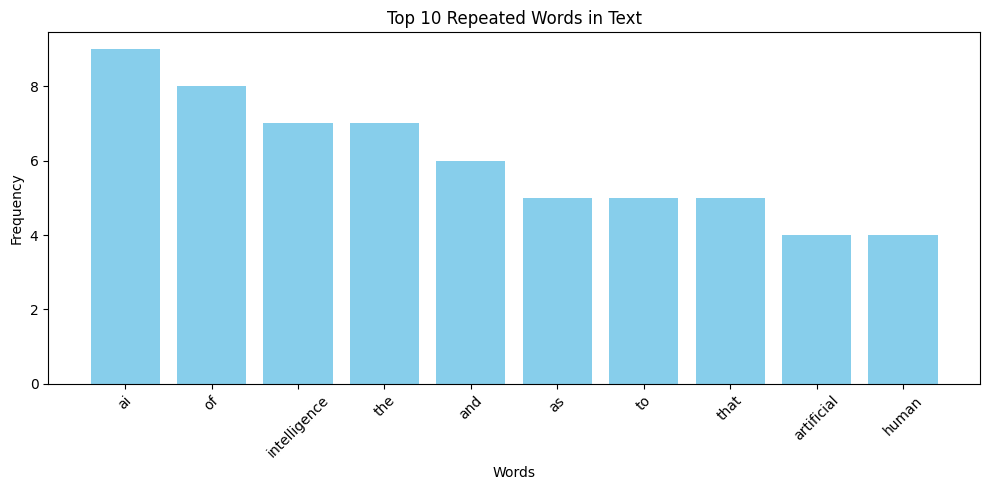


Original Text Length: 212
Summary Length: 74

SUMMARY:
Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to natural intelligence displayed by animals including humans. As machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI, a phenomenon known as the AI effect. The goal of artificial general intelligence (AGI) is to create AI systems that can learn and reason broadly like humans, potentially exceeding human capabilities in most economically valuable domains of work.


In [ ]:
# Example usage
if __name__ == "__main__":
    # Example text
    sample_text = """
    Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to natural intelligence displayed by animals including humans.
    AI research has been defined as the field of study of intelligent agents, which refers to any system that perceives its environment and takes actions that maximize its chance of achieving its goals.
    The term "artificial intelligence" had previously been used to describe machines that mimic and display "human" cognitive skills that are associated with the human mind, such as "learning" and "problem-solving".
    This definition has since been rejected by major AI researchers who now describe AI in terms of rationality and acting rationally, which does not limit how intelligence can be articulated.
    AI applications include advanced web search engines, recommendation systems, understanding human speech, self-driving cars, automated decision-making and competing at the highest level in strategic game systems.
    As machines become increasingly capable, tasks considered to require "intelligence" are often removed from the definition of AI, a phenomenon known as the AI effect.
    Deep learning, a form of machine learning based on artificial neural networks, has driven many recent advances in AI.
    The goal of artificial general intelligence (AGI) is to create AI systems that can learn and reason broadly like humans, potentially exceeding human capabilities in most economically valuable domains of work.
    """

    # Generate summary
    summary = extractive_summarize(sample_text, num_sentences=3)
    print("\nOriginal Text Length:", len(sample_text.split()))
    print("Summary Length:", len(summary.split()))
    print("\nSUMMARY:")
    print(summary)